In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## STEP 1: Load the Data

In [2]:
data = pd.read_csv(r"tips.csv")

In [3]:
#Copy the data to avoid manipulting original dataset
df = data.copy()
df.sample(10)

,order_id,day,time,size,smoker,sex,total_bill,tip
67,68,Sat,Dinner,1,Yes,Female,3.07,1.00
189,190,Sun,Dinner,3,Yes,Male,23.10,4.00
74,75,Sat,Dinner,2,No,Female,14.73,2.20
14,15,Sun,Dinner,2,No,Female,14.83,3.02
144,145,Thur,Lunch,2,No,Female,16.43,2.30
121,122,Thur,Lunch,2,No,Female,13.42,1.68
130,131,Thur,Lunch,2,No,Male,19.08,1.50
46,47,Sun,Dinner,2,No,Male,22.23,5.00
91,92,Fri,Dinner,2,No,Male,22.49,3.50
224,225,Fri,Lunch,2,Yes,Male,13.42,1.58


In [4]:
#Know the shape of the dataset
df.shape

(244, 8)

## Step 2: Understand the data
- This dataset is about a restaurant, showing the total bill of each customer's order and the tips given by them with the day and time of order and the customer's characteristics

#### Determine the problem statement or insight to get from the data
There are no problems here to solve but we can get insight to improve business performance
- We can determine the time or the days of the week the restaurant have more sales using total bill
- We can also determine if customer characteristics affects sales i.e wether male or female gender order more or pays more bill or if smokers order more
- we can also determine if time, day, gender affect the size of order
- we can also determine the attribute that affects tips given by customers

In general my main concern is the tips,total_bill and size of order. I want to know what affect these variables.
Knowing this can improve the restaurant in the following ways:
- Knowing what the days or time in which there more customers can help the restaurant keep track of inventory, to avoid food spoilage from unsold food on days with less order and also can reduce out of stock on days with more customers which can yeild to more revenues
- Knowing what affect the total bill can increase revenue by leveraging more on it
- knwing what affect the tip and leveraging on it can increase employees income and can help in making shift decision(if any), so all employees can get fair share of it

#### Determine the target variable
- The target variable here is Total_bill

In [5]:
df.describe()

,order_id,size,total_bill,tip
count,244.000000,244.000000,244.000000,244.000000
mean,122.500000,2.569672,19.785943,2.998279
std,70.580923,0.951100,8.902412,1.383638
min,1.000000,1.000000,3.070000,1.000000
25%,61.750000,2.000000,13.347500,2.000000
50%,122.500000,2.000000,17.795000,2.900000
75%,183.250000,3.000000,24.127500,3.562500
max,244.000000,6.000000,50.810000,10.000000


- The minimum tips given by customer is \\$1, maximum is \\$10, and the average is \$2.9
- More custoners give tips above \$3.5
- The minimum total bill of customer is \\$3.07, maximum is \\$50.81 and the average is \\$17.80
- The minum number of customer on a table is 1 and maximum is 6 and its more common for 3 people to sit on a table


## Step 3: Explore the data to find errors

#### 3a. Check for duplicates

In [6]:
df.duplicated().sum()

0

###### There are no duplicate values in the dataset

#### 3b. Check for missing values

In [7]:
df.isnull().sum()

order_id      0
day           0
time          0
size          0
smoker        0
sex           0
total_bill    0
tip           0
dtype: int64

###### There are no missing values

#### 3c. Check data type of each variable to check if there are any inconsistencies

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


###### There are no issues with the data type of each variables

#### 3d. Check unique values to know if there are any formatting issues and to gain more insight on each variable

In [9]:
df['day'].unique()
#there are no format errors
#customers visits the restaurant 4 times a week

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
df['time'].unique()
#there are no format errors
#the restaurant only serve during lunch and dinner time

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
df['smoker'].unique()
#there are no format errors

array(['No', 'Yes'], dtype=object)

In [12]:
df['sex'].unique()
#there are no format errors

array(['Female', 'Male'], dtype=object)

#### There are no errors or issues with the data which means it is clean

### Step 4: Analyze and Visualize the data

### 4a. Univariant Analysis

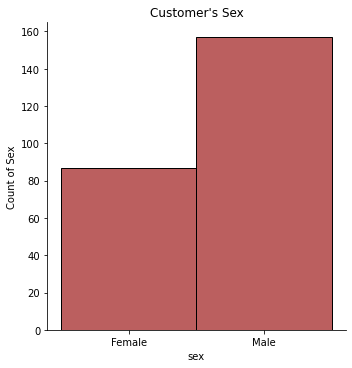

In [317]:
sns.displot(df, x="sex", color='brown')
plt.title("Customer's Sex");
plt.ylabel("Count of Sex");

#### Male gender pays bills more often than the Female

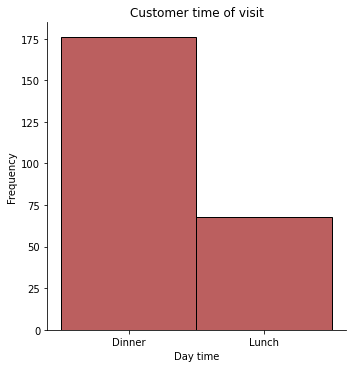

In [318]:
sns.displot(df, x="time", color='brown')
plt.title("Customer time of visit");
plt.ylabel("Frequency");
plt.xlabel("Day time");

#### More customers visit the at Dinner time than Lunch time, we can make any recommendation with this as we don't know if these affects our target variable

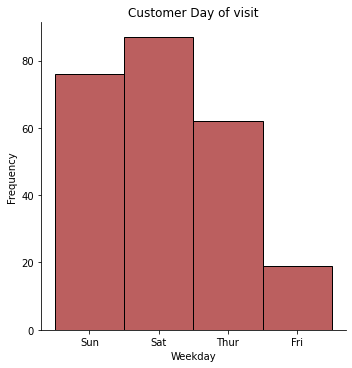

In [319]:
sns.displot(df, x="day", color='brown')
plt.title("Customer Day of visit");
plt.ylabel("Frequency");
plt.xlabel("Weekday");

#### More customers visit the restaurant more on saturdays than every other days

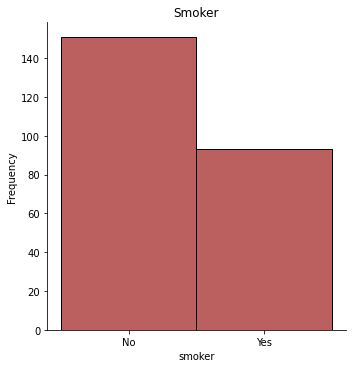

In [320]:
sns.displot(df, x="smoker", color='brown')
plt.title("Smoker");
plt.ylabel("Frequency");
plt.xlabel("smoker");

#### Most tables does not include smokers

We can't make decision with univariate analysis as this doesn't show any correclation with our target variable, this is just for descriptive analysis to gain more insight on the variables

### 4b. Multivariant Analysis

- We already determined that we'll be looking intoto be size, total_bills and tips
- We'll use bivariant analysis to determine how different variables affect our target varable
- we can use this to make decision that can improve business pocesses, reduce cost and increase revenue

What are the factors that affects the restaurant's revenue (total_bills)

C:\Users\DELL\AppData\Local\Temp/ipykernel_14844/3059732884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


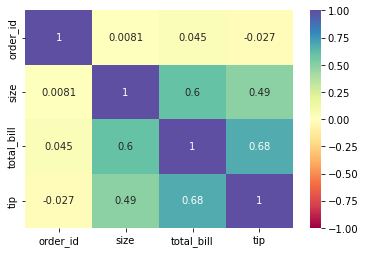

In [300]:
corr_mat = df.corr()
sns.heatmap(data=corr_mat, annot = True, vmin=-1, cmap = "Spectral");

- Size and tip have high correlation with total_bill

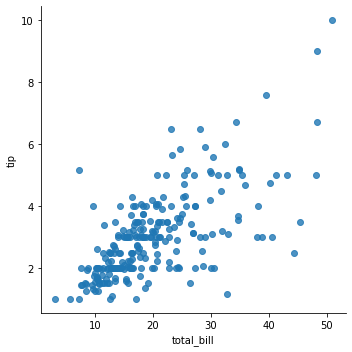

In [322]:
sns.lmplot(y = "tip", x = "total_bill", data=df, fit_reg=False);

- I used this to determine the effect of total_bill on tips
- It has positive(almost) linear effect; which means the higher the total bill, the higher the tip.
- There are some few exceptions here i.e some customer can give low tips even with high total bill

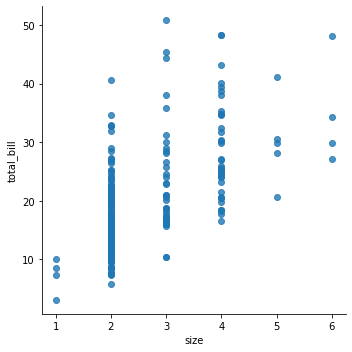

In [303]:
sns.lmplot(x = "size", y = "total_bill", data=df, fit_reg=False);

- I used this to determine the effect of size on total bill
- Size has little effect on total as some table of 2 people can have total bill of 25 while table with 4 people can have total bill of 15
- It has some effect also because the number of people on the table determines the minimum total bill e.g size of 2 have minimum of like like 8 total bill, size of 3 have minimum of 16 and so on. We can say the minimum bill is directly proportional to to size.

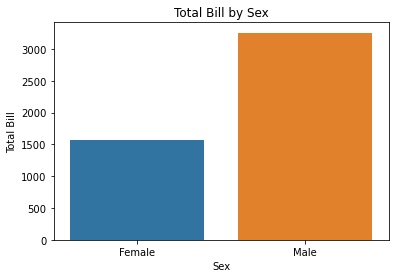

In [133]:
billbysex = df.groupby("sex")["total_bill"].sum().sort_values(ascending = True)
billbysex = billbysex.sort_index(level=['total_bill','sex'])
billbysex_plot = sns.barplot(x = billbysex.index, y = billbysex.values)
plt.title("Total Bill by Sex");
plt.ylabel("Total Bill");
plt.xlabel("Sex");

- Majority of people that pays the bill are men

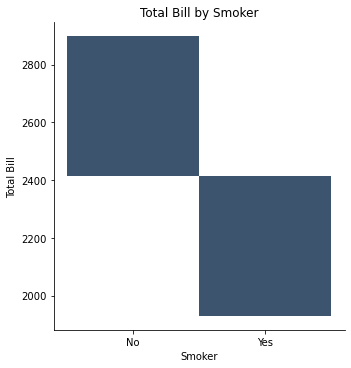

In [182]:
sns.displot(x="smoker", y="total_bill",data=df.groupby('smoker')['total_bill'].sum().to_frame());
plt.title("Total Bill by Smoker");
plt.ylabel("Total Bill");
plt.xlabel("Smoker");

- Majority of the customers don't smoke

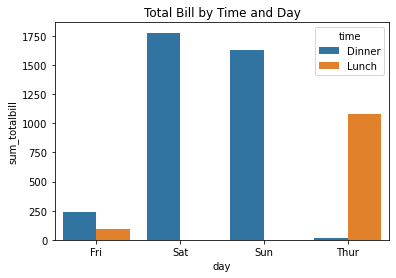

In [323]:
billdt =df.groupby(['day', 'time']).agg(sum_totalbill =("total_bill",'sum'))
billdt = billdt.reset_index()
sns.barplot(x="day", y="sum_totalbill", hue="time", data=billdt);
plt.title("Total Bill by Time and Day");

- Most of the customer visit the restaurant on saturday and sunday during dinner time
- On Thursdays, the majority of customers visit the restaurant for lunch

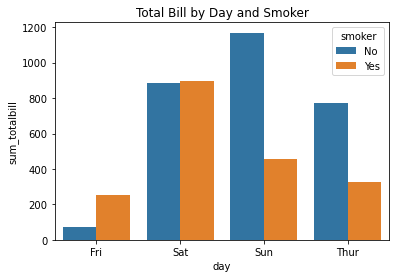

In [324]:
smokerdt =df.groupby(['day','smoker']).agg(sum_totalbill =("total_bill",'sum'))
smokerdt = smokerdt.reset_index()
sns.barplot(x="day", y="sum_totalbill", hue="smoker", data=smokerdt);
plt.title("Total Bill by Day and Smoker");

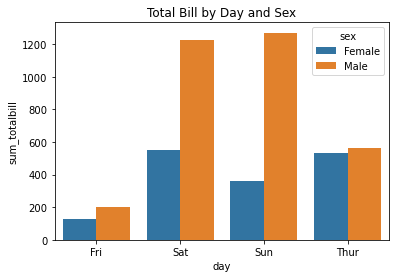

In [325]:
genderdt =df.groupby(['day','sex']).agg(sum_totalbill =("total_bill",'sum'))
genderdt = genderdt.reset_index()
sns.barplot(x="day", y="sum_totalbill", hue="sex", data=genderdt);
plt.title("Total Bill by Day and Sex");

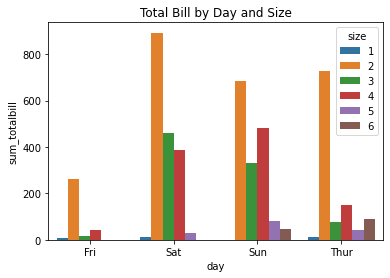

In [328]:
sizedt =df.groupby(['day','size']).agg(sum_totalbill =("total_bill",'sum'))
sizedt = sizedt.reset_index()
sns.barplot(x="day", y="sum_totalbill", hue="size", data=sizedt);
plt.title("Total Bill by Day and Size");

- The majority of customers who visit the restaurant come in groups of two. i.e of the size 2

### Step 5: Conclusion

- More customers visits the restaurants on Saturdays and Sundays for Dinner
- On thursdays most of the customers visit for lunch
- Size of the table doesnt determine the total bill
- Majority of the tables do not have smokers

### Step 6: Recommendations

- I reccommend that more food should be available on saturdays and sundays 
- There should be very few food made for dinner to avoid wastage and more food should be made for lunch